In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset 
import torchvision
import pandas as pd
from torchvision.transforms import ToPILImage

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device: ' + str(device))


batch_size = 100

path = 'data/'
train_data = torchvision.datasets.CIFAR10(root=path, train=True, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.CIFAR10(root=path, train=False, transform=torchvision.transforms.ToTensor())

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10000, shuffle=False)


img_classes = {0: 'airplane',
               1: 'automobile',
               2: 'bird',
               3: 'cat',
               4: 'deer',
               5: 'dog',
               6: 'frog',
               7: 'horse',
               8: 'ship',
               9: 'truck',}

device: cpu


torch.Size([3, 32, 32])
torch.Size([32, 32, 3])


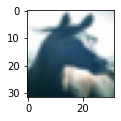

label =  7 horse


In [3]:
i = np.random.randint(50000)
image, label = train_data[i]
print(image.shape)
r = image[0]
g = image[1]
b = image[2]
im = torch.stack((r, g, b), dim=2)
print(im.shape)
plt.rcParams['figure.figsize'] = [1.6, 1.6]
plt.imshow(im)
plt.show()
print('label = ', label, img_classes[label])

In [4]:
len(test_data)

10000

In [17]:
class ConvNeuralNet(nn.Module):
    
    def __init__(self):
        super(ConvNeuralNet, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.pool2 =nn.MaxPool2d(kernel_size=2)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5)
        
        self.lin_1 = nn.Linear(120, 84)
        self.lin_2 = nn.Linear(84, 10)
        
        self.drop_input = nn.Dropout2d(p=0.05)
        self.drop_conv1 = nn.Dropout2d(p=0.05)
        self.drop_conv3 = nn.Dropout(p=0.05)
        self.drop_lin1 = nn.Dropout(p=0.05)
        
    def forward(self, x):
        x = self.drop_input(x)

        x = torch.relu(self.conv1(x))
        x = self.drop_conv1(x)
        x = self.pool1(x)
        
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        
        x = torch.relu(self.conv3(x))
        
        x = x.view(-1, 120)
        x = self.drop_conv3(x)
        
        x = torch.relu(self.lin_1(x))
        x = self.drop_lin1(x)
        x = self.lin_2(x)
        
        return x
    
model_conv = ConvNeuralNet()

In [8]:
model_conv(image.view(1,3,32,32))

tensor([[ 0.0856,  0.0860,  0.0298, -0.0288,  0.0563,  0.1436,  0.0173,  0.1185,
         -0.0359,  0.1276]], grad_fn=<AddmmBackward>)

In [30]:
model_conv.train()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_conv.parameters(), lr=0.001)


for epoch in range(15):
    for i, batch in enumerate(train_loader):
        images, labels = batch
        y_pred = model_conv(images).to(device)
        loss = criterion(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%100==0:
            print(epoch, i, loss)

0 0 tensor(1.0193, grad_fn=<NllLossBackward>)
0 100 tensor(0.9064, grad_fn=<NllLossBackward>)
0 200 tensor(1.0411, grad_fn=<NllLossBackward>)
0 300 tensor(0.9119, grad_fn=<NllLossBackward>)
0 400 tensor(0.9821, grad_fn=<NllLossBackward>)
1 0 tensor(0.9872, grad_fn=<NllLossBackward>)
1 100 tensor(0.9986, grad_fn=<NllLossBackward>)
1 200 tensor(1.0797, grad_fn=<NllLossBackward>)
1 300 tensor(1.2244, grad_fn=<NllLossBackward>)
1 400 tensor(1.0234, grad_fn=<NllLossBackward>)
2 0 tensor(0.9916, grad_fn=<NllLossBackward>)
2 100 tensor(0.9170, grad_fn=<NllLossBackward>)
2 200 tensor(1.1251, grad_fn=<NllLossBackward>)
2 300 tensor(0.9224, grad_fn=<NllLossBackward>)
2 400 tensor(0.8964, grad_fn=<NllLossBackward>)
3 0 tensor(0.8154, grad_fn=<NllLossBackward>)
3 100 tensor(0.8902, grad_fn=<NllLossBackward>)
3 200 tensor(0.8856, grad_fn=<NllLossBackward>)
3 300 tensor(0.9753, grad_fn=<NllLossBackward>)
3 400 tensor(0.9034, grad_fn=<NllLossBackward>)
4 0 tensor(0.7682, grad_fn=<NllLossBackward>)
4 

In [61]:
model_conv.eval()
with torch.no_grad():
    for test_batch in test_loader:
        images, labels = test_batch
        y_pred = model_conv(images).to(device)
        max_inidices = torch.max(y_pred, dim=1)[1]
        n_correct = (labels == max_inidices).sum()

        print(n_correct.item()/100)

64.46


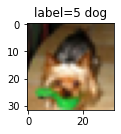

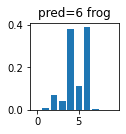

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [49]:
plt.rcParams['figure.figsize'] = [1.6, 1.6]

def test():
    i = np.random.randint(50000)
    image, label = train_data[i]
    r = image[0]
    g = image[1]
    b = image[2]
    im = torch.stack((r, g, b), dim=2)
    plt.figure(1)
    plt.imshow(im)
    plt.title('label=' + str(label) + ' ' + img_classes[label])

    
    with torch.no_grad():
        y_pred = model_conv(image.view(1,3,32,32))
        y = y_pred.view(10)
        y_max = y.max()
        y_prob = torch.exp(y - y_max) / torch.sum(torch.exp(y - y_max))
        pred = y_prob.argmax().item()
        plt.figure(2)
        plt.bar(range(10), y_prob)
        plt.title('pred=' + str(pred) + ' ' + img_classes[pred])
        plt.show()
        print(img_classes)
        
test()

In [64]:
PATH = 'hello'
torch.save(model_conv.state_dict(), PATH)

In [18]:
PATH = 'conv net 1'
model_conv.load_state_dict(torch.load(PATH))


<All keys matched successfully>

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


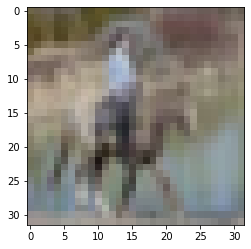

In [105]:
plt.rcParams['figure.figsize'] = [4, 4]

i = np.random.randint(50000)
image, label = train_data[i]
r = image[0]
g = image[1]
b = image[2]
im = torch.stack((r, g, b), dim=2)
plt.figure(0)
plt.imshow(im)
print(img_classes)

plt.rcParams['figure.figsize'] = [1.6, 1.6]

def test(i=i):
    image, label = train_data[i]
    r = image[0]
    g = image[1]
    b = image[2]
    im = torch.stack((r, g, b), dim=2)
    plt.figure(1)
    plt.imshow(im)
    plt.title('label=' + str(label) + ' ' + img_classes[label])

    
    with torch.no_grad():
        y_pred = model_conv(image.view(1,3,32,32))
        y = y_pred.view(10)
        y_max = y.max()
        y_prob = torch.exp(y - y_max) / torch.sum(torch.exp(y - y_max))
        pred = y_prob.argmax().item()
        plt.figure(2)
        plt.bar(range(10), y_prob)
        plt.title('pred=' + str(pred) + ' ' + img_classes[pred])
        plt.show()
        print(img_classes)


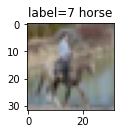

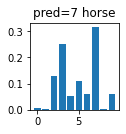

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [106]:
test()

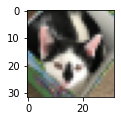

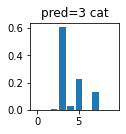

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [102]:
my_image = img.imread('bounty.jpg', format='jpg')
height, length, color = my_image.shape

def new_img(image):
    new_image = np.zeros((32,32,3))
    
    for i in range(32):
        for j in range(32):
            pos_i = i * 24 + 200
            pos_j = j * 24
            fat_pixel = image[pos_i:pos_i+24, pos_j:pos_j+24]
            new_image[i,j] = np.sum(fat_pixel, axis=(0,1))
    return new_image/new_image.max()


my_img = new_img(my_image)
plt.imshow(my_img)

my_img = torch.tensor(my_img, dtype=torch.float32)
r = my_img[:,:,0]
g = my_img[:,:,1]
b = my_img[:,:,2]
my_img = torch.stack((r,g,b))
with torch.no_grad():
    y_pred = model_conv(my_img.view(1,3,32,32))
    y = y_pred.view(10)
    y_max = y.max()
    y_prob = torch.exp(y - y_max) / torch.sum(torch.exp(y - y_max))
    pred = y_prob.argmax().item()
    plt.figure(2)
    plt.bar(range(10), y_prob)
    plt.title('pred=' + str(pred) + ' ' + img_classes[pred])
    plt.show()
    print(img_classes)
